# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
# Memuat dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Submission Akhir BMLP/House_Rent_Dataset.csv')
df

print(df.head())
print(df.info())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Co



### **Sumber Dataset**  
Dataset ini diambil dari *House Rent Prediction Dataset* yang tersedia di platform [Kaggle](https://www.kaggle.com/).



###  **Deskripsi Atribut dalam Dataset**

- **BHK**: Menunjukkan jumlah total ruangan, termasuk kamar tidur, ruang tamu, dan dapur.
- **Rent**: Biaya sewa properti dalam satuan mata uang lokal.
- **Size**: Luas properti yang dinyatakan dalam satuan meter persegi.
- **Area Type**: Jenis pengukuran area properti, bisa berupa *Super Area*, *Carpet Area*, atau *Build Area*.
- **Area Locality**: Nama wilayah atau lingkungan tempat properti berada.
- **City**: Kota tempat properti disewakan.
- **Furnishing Status**: Kondisi kelengkapan furnitur properti, yaitu *Furnished*, *Semi-Furnished*, atau *Unfurnished*.
- **Tenant Preferred**: Tipe penyewa yang diharapkan oleh pemilik properti, seperti *Bachelors*, *Family*, atau keduanya.
- **Bathroom**: Jumlah kamar mandi yang tersedia dalam properti.
- **Point of Contact**: Informasi kontak yang dapat dihubungi terkait penyewaan properti.



# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:

# Memahami struktur data
print(f"Jumlah baris dan kolom: {df.shape}")
print(df.describe())


Jumlah baris dan kolom: (4746, 12)
               BHK          Rent         Size     Bathroom
count  4746.000000  4.746000e+03  4746.000000  4746.000000
mean      2.083860  3.499345e+04   967.490729     1.965866
std       0.832256  7.810641e+04   634.202328     0.884532
min       1.000000  1.200000e+03    10.000000     1.000000
25%       2.000000  1.000000e+04   550.000000     1.000000
50%       2.000000  1.600000e+04   850.000000     2.000000
75%       3.000000  3.300000e+04  1200.000000     2.000000
max       6.000000  3.500000e+06  8000.000000    10.000000


In [ ]:
# Mengetahui jumlah nilai yang hilang pada setiap kolom
null_counts = df.isnull().sum()
print(f"Jumlah data yang kosong di tiap kolom:\n{null_counts}")


Jumlah data yang kosong di tiap kolom:
Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64


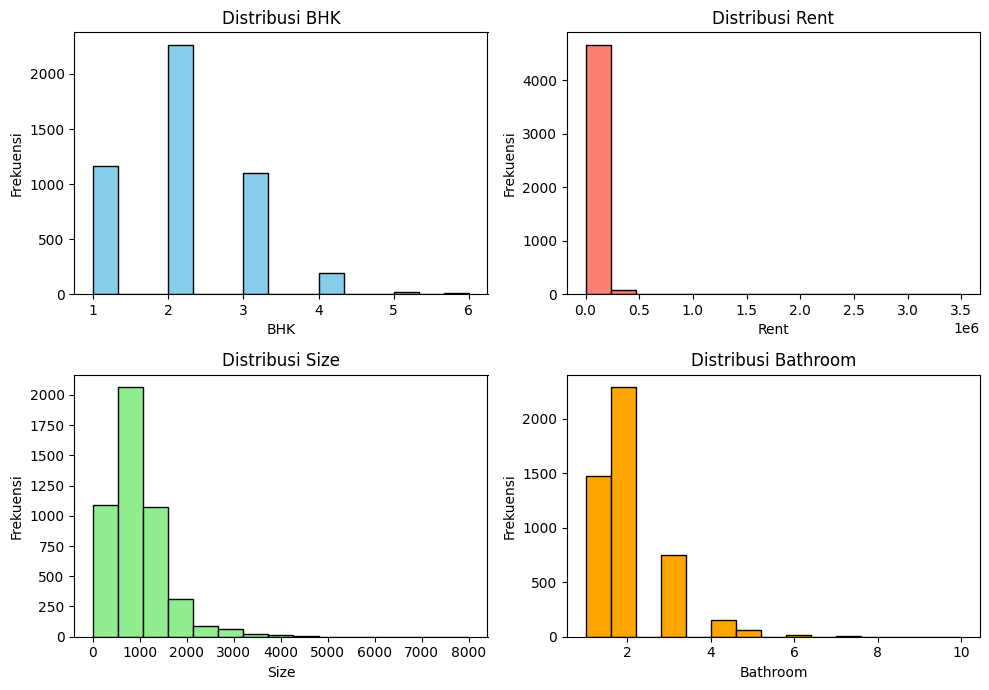

In [ ]:
# Membuat histogram untuk masing-masing kolom numerik dengan warna berbeda
kolom_numerik = ['BHK', 'Rent', 'Size', 'Bathroom']
warna = ['skyblue', 'salmon', 'lightgreen', 'orange']

plt.figure(figsize=(10, 7))
for i, kolom in enumerate(kolom_numerik):
    plt.subplot(2, 2, i+1)
    plt.hist(df[kolom], bins=15, color=warna[i], edgecolor='black')
    plt.title(f'Distribusi {kolom}')
    plt.xlabel(kolom)
    plt.ylabel('Frekuensi')
    plt.tight_layout()

plt.show()


<ipython-input-15-d52f43dbfff7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Furnishing Status', palette='Set2')


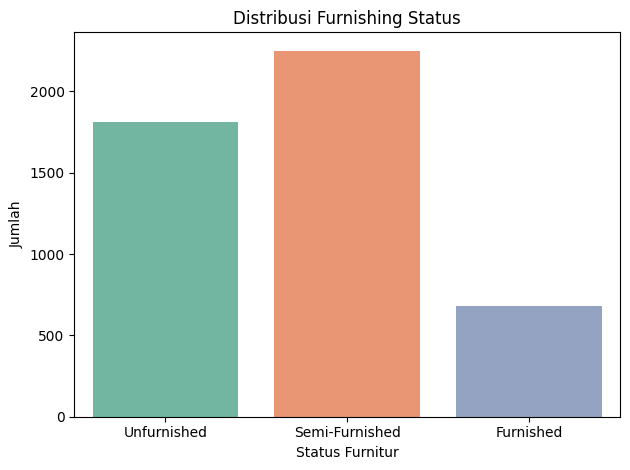

In [ ]:
# Menampilkan jumlah masing-masing kategori pada kolom 'Furnishing Status'
sns.countplot(data=df, x='Furnishing Status', palette='Set2')
plt.title('Distribusi Furnishing Status')
plt.xlabel('Status Furnitur')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
# Menghapus data yang memiliki nilai kosong pada kolom utama dan menghilangkan data ganda
data = df.dropna(subset=['BHK', 'Rent', 'Size', 'Bathroom'])
data = df.drop_duplicates()


In [ ]:
# Konversi fitur kategorikal ke bentuk numerik menggunakan one-hot encoding
encoded_features = pd.get_dummies(df[['Furnishing Status', 'Area Type', 'City', 'Tenant Preferred']], drop_first=True)

# Menambahkan kolom baru untuk harga per kaki persegi
df['Price_per_SqFt'] = df['Rent'] / df['Size']

# Menentukan kolom numerik yang relevan dan menggabungkannya dengan fitur hasil encoding
numerical_cols = ['BHK', 'Rent', 'Size', 'Bathroom', 'Price_per_SqFt']
X = pd.concat([df[numerical_cols], encoded_features], axis=1)

# Mengubah seluruh nilai menjadi tipe integer agar siap digunakan dalam model
X = X.astype(int)

# Menampilkan lima data teratas dari hasil akhir
X.head()


,BHK,Rent,Size,Bathroom,Price_per_SqFt,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,2,10000,1100,2,9,0,1,0,1,0,0,0,1,0,1,0
1,2,20000,800,1,25,1,0,0,1,0,0,0,1,0,1,0
2,2,17000,1000,1,17,1,0,0,1,0,0,0,1,0,1,0
3,2,10000,800,1,12,0,1,0,1,0,0,0,1,0,1,0
4,2,7500,850,1,8,0,1,1,0,0,0,0,1,0,0,0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

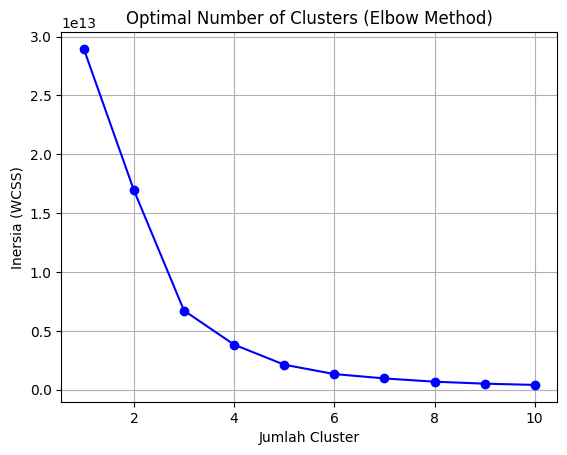

In [ ]:
# Mencari jumlah cluster yang optimal menggunakan metode Elbow
cluster_errors = []

for clusters in range(1, 11):
    model = KMeans(n_clusters=clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    model.fit(X)
    cluster_errors.append(model.inertia_)

# Visualisasi hasil Elbow Method
plt.plot(range(1, 11), cluster_errors, marker='o', linestyle='-', color='b')
plt.title('Optimal Number of Clusters (Elbow Method)')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inersia (WCSS)')
plt.grid(True)
plt.show()


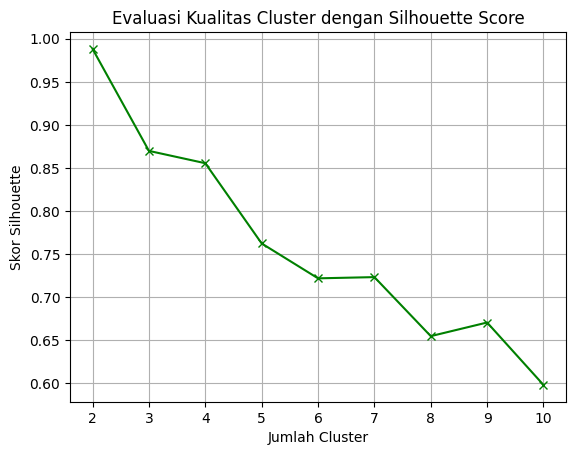

In [ ]:
# Menggunakan Silhouette Score untuk mengevaluasi performa clustering
silhouette_values = []

for cluster_count in range(2, 11):
    model = KMeans(n_clusters=cluster_count, init='k-means++', max_iter=300, n_init=10, random_state=42)
    model.fit(X)
    score = silhouette_score(X, model.labels_)
    silhouette_values.append(score)

# Plot Silhouette Score
plt.plot(range(2, 11), silhouette_values, marker='x', linestyle='-', color='g')
plt.title('Evaluasi Kualitas Cluster dengan Silhouette Score')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Skor Silhouette')
plt.grid(True)
plt.show()


In [ ]:
# Menentukan jumlah cluster yang optimal, misalnya 4
optimal_k = 4
kmeans_model = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
predicted_clusters = kmeans_model.fit_predict(X)

# Menyisipkan label cluster ke dalam dataset
X['Cluster_Label'] = predicted_clusters


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
# Menghitung Skor Silhouette untuk mengevaluasi kualitas clustering
cluster_score = silhouette_score(X.drop(columns=['Cluster_Label']), predicted_clusters)
print(f'Skor Silhouette untuk jumlah cluster {optimal_k}: {cluster_score}')


Skor Silhouette untuk jumlah cluster 4: 0.8555479140610164


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

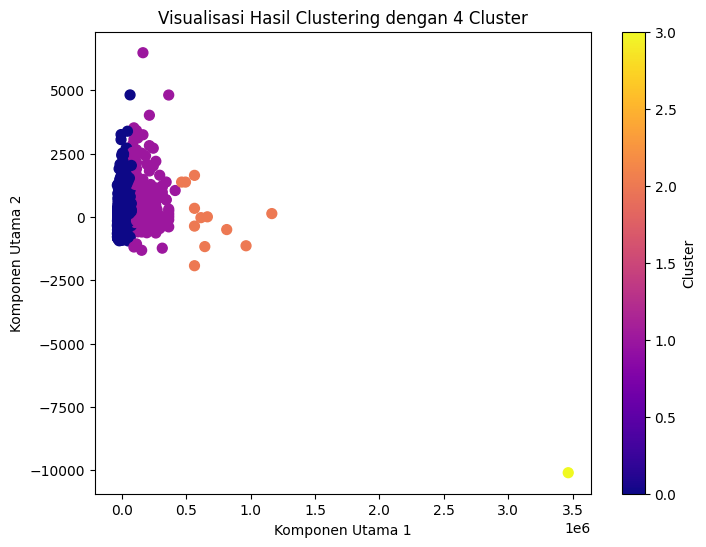

In [ ]:
# Menggunakan PCA untuk mereduksi dimensi data dan memvisualisasikan hasil clustering dalam 2D
pca_model = PCA(n_components=2)
X_pca_reduced = pca_model.fit_transform(X.drop(columns=['Cluster_Label']))

# Visualisasi hasil clustering setelah reduksi dimensi dengan warna yang berbeda
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=predicted_clusters, cmap='plasma', s=50)
plt.title(f'Visualisasi Hasil Clustering dengan {optimal_k} Cluster')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.colorbar(label='Cluster')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Mengelompokkan data berdasarkan label cluster dan menganalisis rata-rata fitur per cluster
cluster_statistics = X.groupby('Cluster_Label').mean()

# Menampilkan ringkasan statistik rata-rata untuk setiap cluster
print("Rangkuman Rata-rata Fitur per Cluster:")
print(cluster_statistics)


Rangkuman Rata-rata Fitur per Cluster:
                    BHK          Rent         Size  Bathroom  Price_per_SqFt  \
Cluster_Label                                                                  
0              2.005133  2.303256e+04   901.012051  1.861192       33.277840   
1              3.380952  2.018254e+05  2036.904762  3.710317      122.730159   
2              4.166667  7.091667e+05  3206.333333  4.333333      255.166667   
3              3.000000  3.500000e+06  2500.000000  3.000000     1400.000000   

               Furnishing Status_Semi-Furnished  \
Cluster_Label                                     
0                                      0.469761   
1                                      0.547619   
2                                      0.583333   
3                                      1.000000   

               Furnishing Status_Unfurnished  Area Type_Carpet Area  \
Cluster_Label                                                         
0                              



**Cluster 0:**  
Properti dalam kelompok ini rata-rata memiliki 2 kamar tidur (BHK), dengan harga sewa sekitar Rp 23.032.556 dan luas sekitar 901 kaki persegi. Rata-rata harga per kaki persegi mencapai Rp 33.280. Sebanyak 47% properti di cluster ini berstatus semi-furnished, dan 54% di antaranya menggunakan sistem pengukuran Super Area dibandingkan Carpet Area. Properti tersebar di berbagai kota, dengan konsentrasi tertinggi di Hyderabad sebesar 19%. Terkait tipe penyewa, sebanyak 73% properti ditujukan untuk kelompok Bachelors maupun keluarga (Bachelors/Family).

**Cluster 1:**  
Cluster ini didominasi oleh properti dengan rata-rata 3 kamar tidur, harga sewa mencapai Rp 201.825.400, dan ukuran rata-rata sebesar 2.037 kaki persegi. Rata-rata harga per kaki persegi sebesar Rp 122.730. Sebanyak 55% unit berstatus semi-furnished, dan 87% di antaranya menggunakan Carpet Area sebagai standar pengukuran. Sekitar 74% dari properti dalam cluster ini berlokasi di Mumbai, sementara 62% properti disewa oleh penyewa bertipe Bachelors/Family.

**Cluster 2:**  
Pada cluster ini, rata-rata properti memiliki 4 kamar tidur (BHK), dengan harga sewa sekitar Rp 709.166.667 dan ukuran mencapai 3.206 kaki persegi. Biaya sewa per kaki persegi adalah Rp 255.170. Sebanyak 58% properti tergolong semi-furnished, dan seluruhnya (100%) menggunakan sistem pengukuran Carpet Area. Sebagian besar properti, yakni 83%, berada di Mumbai. Untuk tipe penyewa, 75% properti diperuntukkan bagi kelompok Bachelors/Family.

**Cluster 3:**  
Cluster ini mencerminkan properti kelas atas dengan rata-rata 3 kamar tidur (BHK), harga sewa yang sangat tinggi yaitu Rp 3.500.000.000, dan luas bangunan sekitar 2.500 kaki persegi. Rata-rata biaya per kaki persegi adalah Rp 1.400.000. Semua properti di dalam cluster ini (100%) berstatus semi-furnished dan menggunakan sistem Carpet Area sepenuhnya.



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:

from google.colab import files

files.download('hasil_data_clustering.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>